In [21]:
import numpy as np
import queue
import matplotlib.pyplot as plt
import itertools as it
from prettytable import PrettyTable

In [30]:
#Receives a list that represents the state: [n1,n2,...] where n1 != n2!= ...
def equal_state(state1,state2):
    rows = len(state1)
    columns = len(state1[0])
    for row in range(0,rows):
        for column in range(0, columns):
            if not(state1[row][column]==state2[row][column]):
                #print(str(state1[row][column])+""+str(state2[row][column]))
                return False
    return True

#Receives a matrix that represents the state: [n1,n2,...] where n1 != n2!= ...
def goaltest(state):
    passes = False
    goals = [[[0,1,2],[3,4,5],[6,7,8]],
             [[1,2,3],[4,5,6],[7,8,0]]]
    for goal in goals:
        #print("goal: "+str(goal))
        passes = passes or equal_state(state,goal)
    return passes

def printBoard(arr_solution):
    if arr_solution != []:
        temp_solution = list(it.chain(*arr_solution))

        width  = len(arr_solution)
        height = len(arr_solution[0]) 
        
        puzzle = np.zeros((width,height))
        puzzle[1::2,0::2] = 1
        puzzle[0::2,1::2] = 1

        plt.imshow(puzzle, cmap='binary')
        
        for i in range(0,width):
            for j in range(0,height):
                character = str(arr_solution[i][j])
                plt.text(j, i, character, fontsize=20, ha='center', va='center', color='black' if (i - j) % 2 == 0 else 'white')
        plt.show()

In [23]:
def get_element_position(state,value):
    rows = len(state)
    columns = len(state[0])
    for row in range(0,rows):
        for column in range(0, columns):
            if(value == state[row][column]):
                return row,column

def swap_elements_by_position(state,el1,el2):
    tempval = state[el1[0]][el1[1]]
    state[el1[0]][el1[1]] = state[el2[0]][el2[1]]
    state[el2[0]][el2[1]] = tempval
    return state

In [24]:
#Expands the actual node, returns a list of states
def expand(state):
    expanded = []    
    
    i,j = get_element_position(state,0)
    blank_pos = [i,j]
              # [V+,H+,V-,H-]
              # [up,right,down,left]
    movements = [i-1,j+1,i+1,j-1]
    names = ["ARRIBA","DERECHA","ABAJO","IZQUIERDA"]
    #print(str(i)+"<-i/j>"+str(j))
    for mov_index in range(0,4):
        move = movements[mov_index]
        if not(move > 2 or move < 0):
            #print(names[mov_index])
            #print("mov_index: "+str(mov_index)+" PASA: "+str(move)+" state[0,move]:"+str(t[0][move])+" state[move,0]:"+str(t[move][0]))
            temporal = np.array(state)
            #Vertical
            if(mov_index%2 == 0):
                something = swap_elements_by_position(temporal,blank_pos,[move,j])
                #print("Cae en SI "+str(mov_index)+" "+str(t))
            #Horizontal
            else:
                something = swap_elements_by_position(temporal,blank_pos,[i,move])
                #print("Cae en NO "+str(mov_index)+" "+str(t))
            
            expanded.append(something.tolist())
            #print(expanded)
    return expanded

In [25]:
def addtoQueue(queue_,list_of_lists):
    for l in list_of_lists:
        queue_.put(l)

def printQueue(queue_,elem_limit):
    queue_= list(queue_.queue)
    if len(queue_)<elem_limit:
        print("frontier = "+str(np.array(queue_)))

In [26]:
# MAIN ALGORITHM
cost=1

def BFS(frontier):
    global cost
    act_element = frontier.get()
    print("\n"+str(cost)+". ================================")
    
    printBoard(act_element)
    
    if goaltest(act_element):
        print("The BFS of the 8-Puzzle is: "+str(act_element))
        return
    
    offspring = expand(act_element)
    #print("===== offspring =====")
    #print(str(np.array(offspring)))
    
    addtoQueue(frontier,offspring)
    
    #printQueue(frontier,30)
    cost+=1
    BFS(frontier)


0. ================================


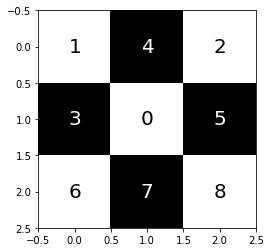


1. ================================


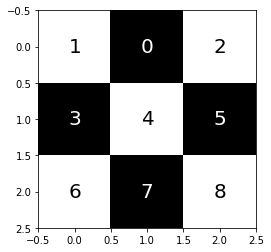


2. ================================


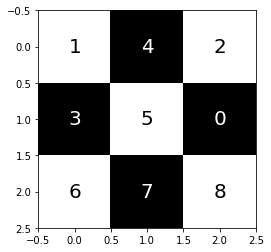


3. ================================


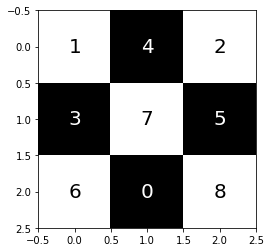


4. ================================


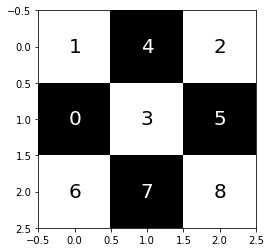


5. ================================


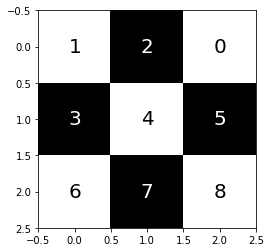


6. ================================


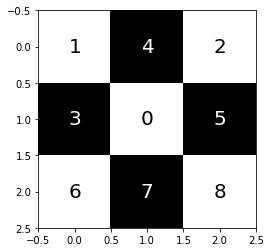


7. ================================


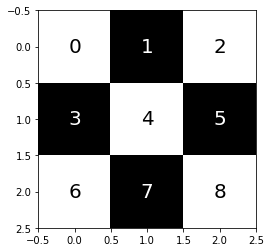

The BFS of the 8-Puzzle is: [[0, 1, 2], [3, 4, 5], [6, 7, 8]]
7 iterations were done.


In [31]:
front = queue.Queue()
front.put([[1,4,2],
           [3,0,5],
           [6,7,8]])#[1,1,1,1])
BFS(front)
print(str(cost)+" iterations were done.")
cost = 0
front.queue.clear()

# Expand function testing

In [8]:
my_state = [[0,1,2],[3,4,5],[6,7,8]] #Result must be: [[0,1,2],[3,4,5],[6,7,8]] or [[1,2,3],[4,5,6],[7,8,0]]
#print(str(goaltesT(my_state)))
print("EXPANDIDOS: "+str(np.array(expand(my_state))))
print("GOALTEST: "+str(goaltest(my_state)))

0<-i/j>0
DERECHA
ABAJO
EXPANDIDOS: [[[1 0 2]
  [3 4 5]
  [6 7 8]]

 [[3 1 2]
  [0 4 5]
  [6 7 8]]]
GOALTEST: True


In [9]:
swap_elements_by_position([[8,1,2],[3,4,5],[6,7,0]],[2,2],[0,0])

[[0, 1, 2], [3, 4, 5], [6, 7, 8]]